In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
X_train['Age_99']=X_train['Age'].fillna(99)
X_train['Age_minus1']=X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [8]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477435
Age Variance after 99 wala imputation:  932.9665366701432
Age Variance after -1 wala imputation:  315.9955036260055
Original Fare variable variance:  2761.0314349486343
Fare Variance after 999 wala imputation:  47525.470595360035
Fare Variance after -1 wala imputation:  2675.2394049177024


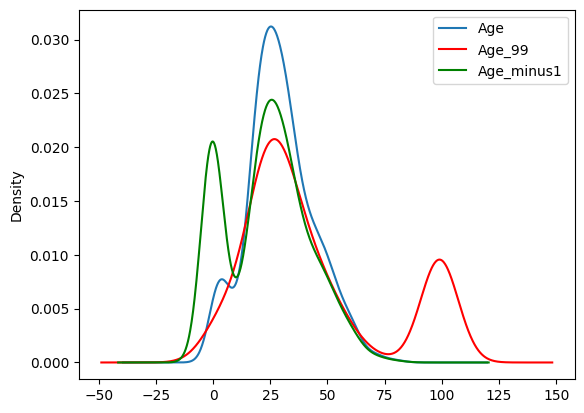

In [11]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with the median
X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

#variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')